# <font color = 'orange'> Algerian Forest Fires Dataset

Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the **Bejaia region** located in the north-east of Algeria and the **Sidi Bel-abbes region** located in the north-west of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 **output attribue (class)**
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)  
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8  
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

---

### <font color = 'Blue'> Import library , load dataset and understand data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header = 1)

dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


#### Here,Temperature is my dependent feature.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#### <font color = '#AA00FF'> Observation :
* We can see that all are object data type but they are integer.

---

## Data Cleaning

In [4]:
# missing values

dataset[dataset.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


#### <font color = '#AA00FF'> Observation :
* Dataset till 122 is Bejaia region and from 122 it is Sidi Bel-abbes region.  
1 : Bejaia region  
2 : Sidi Bel-abbes region

In [5]:
# adding new feature

dataset.loc[:122,'Region'] = 1
dataset.loc[122:,'Region'] = 2

df = dataset

In [6]:
df['Region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: Region
Non-Null Count  Dtype  
--------------  -----  
246 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB


#### <font color = '#AA00FF'> Observation :
* Region is float type now but it is an integer.

In [7]:
df['Region'] = df['Region'].astype(int)

In [8]:
df['Region'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: Region
Non-Null Count  Dtype
--------------  -----
246 non-null    int32
dtypes: int32(1)
memory usage: 1.1 KB


In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


---

In [10]:
# removing null values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

#### <font color = '#AA00FF'> Observation :
* There are few null values so we can drop those null values.

In [11]:
df = df.dropna().reset_index(drop = True)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

---

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [14]:
df = df.drop(122).reset_index(drop = True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2


---

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

---

In [19]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [20]:
df['Classes'] = df['Classes'].str.strip()

In [21]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

---

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [23]:
# changing required features data type into integer

df[['day','month','year','Temperature','RH','Ws']] = df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [24]:
# changing required features data type into float 

df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


---

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [28]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index = False)

---

## EDA

In [29]:
df_copy = df.drop(['day','month','year'],axis = 1)

In [30]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


---

In [31]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [32]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [33]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

---

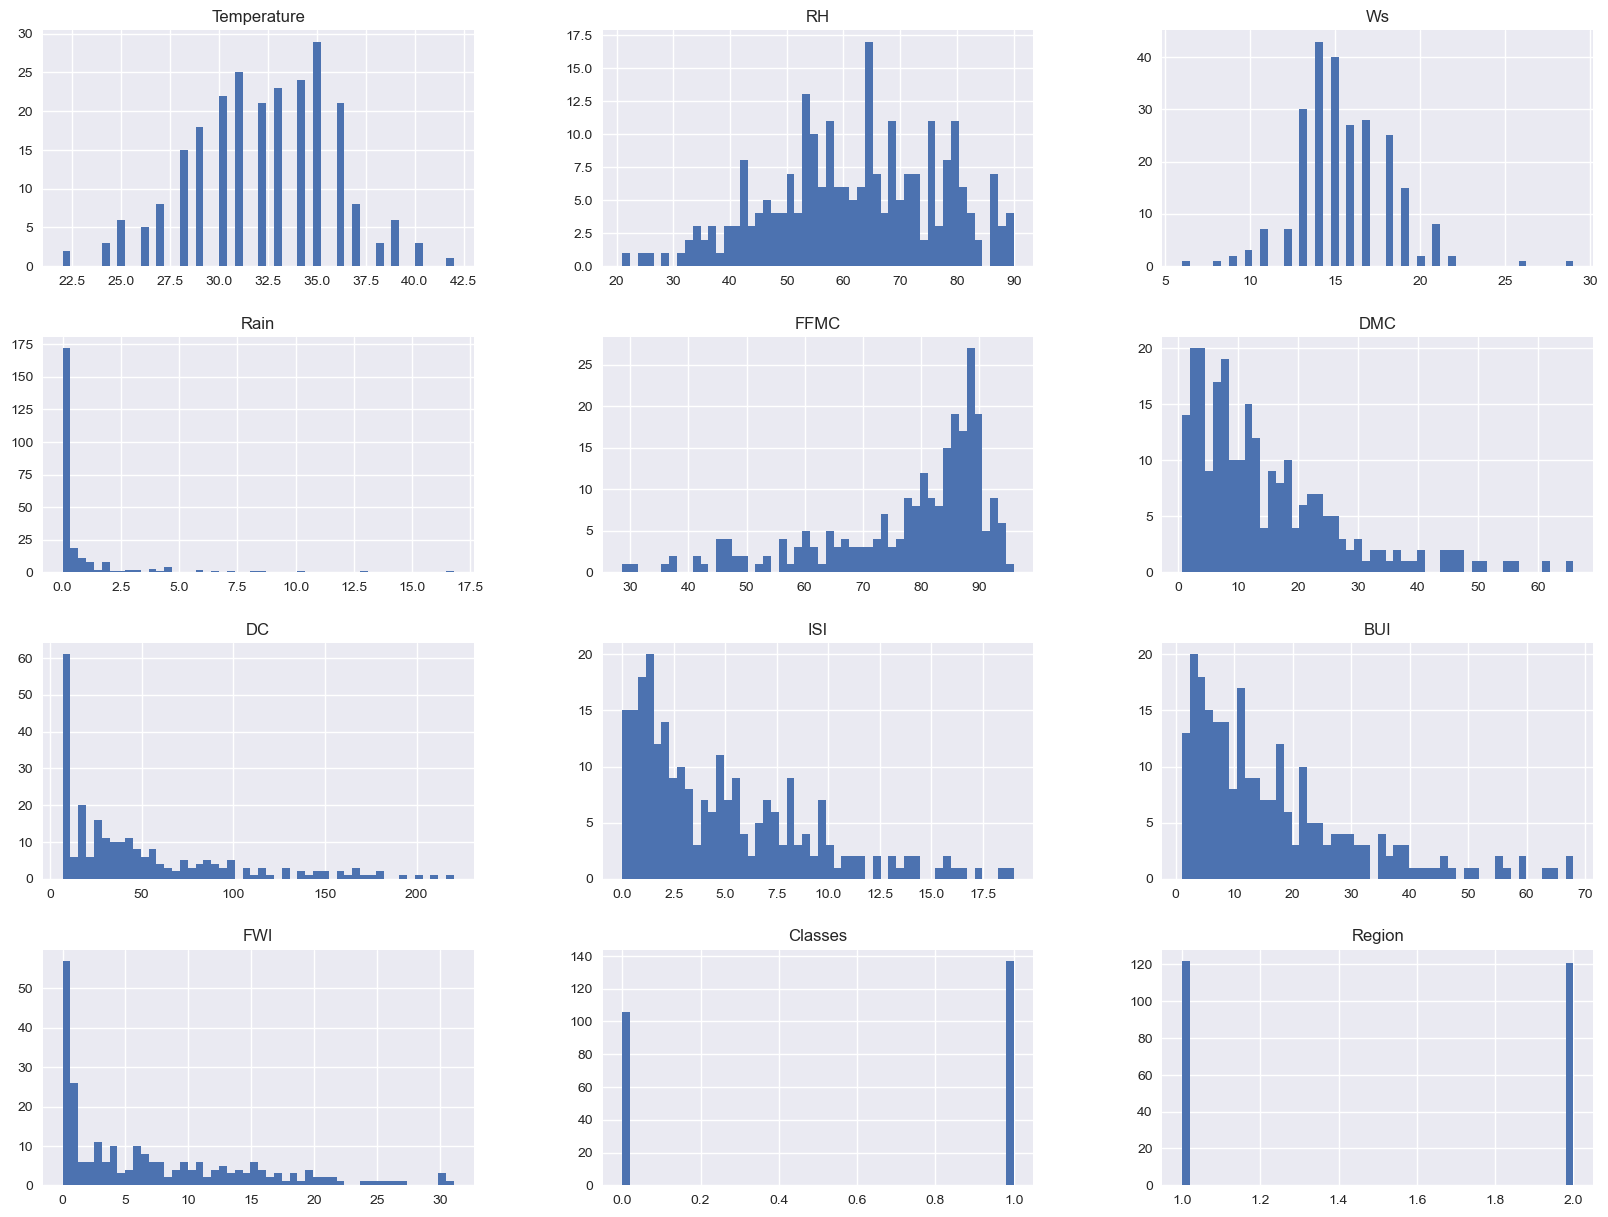

In [34]:
plt.style.use('seaborn')
df_copy.hist(bins = 50,figsize = (20,15))
plt.show()

---

In [35]:
# Percentage for pie chart 
percentage = df_copy['Classes'].value_counts(normalize = True)*100

percentage

1    56.378601
0    43.621399
Name: Classes, dtype: float64

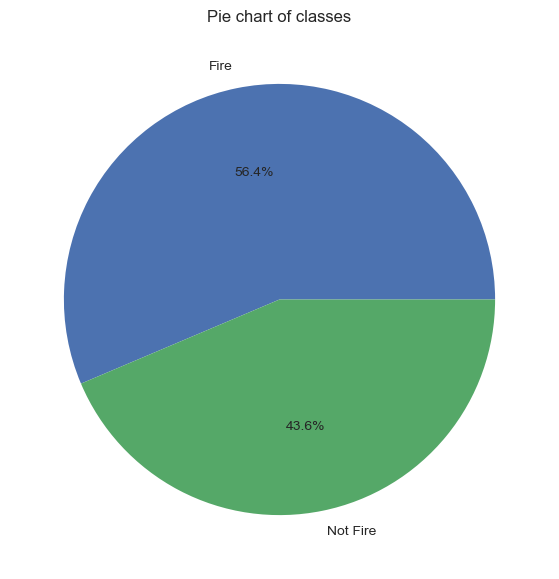

In [36]:
plt.figure(figsize = (12,7))

plt.pie(percentage,labels = ['Fire','Not Fire'],autopct = '%1.1f%%')

plt.title('Pie chart of classes')
plt.show()

---

In [37]:
# correlation

df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<AxesSubplot:>

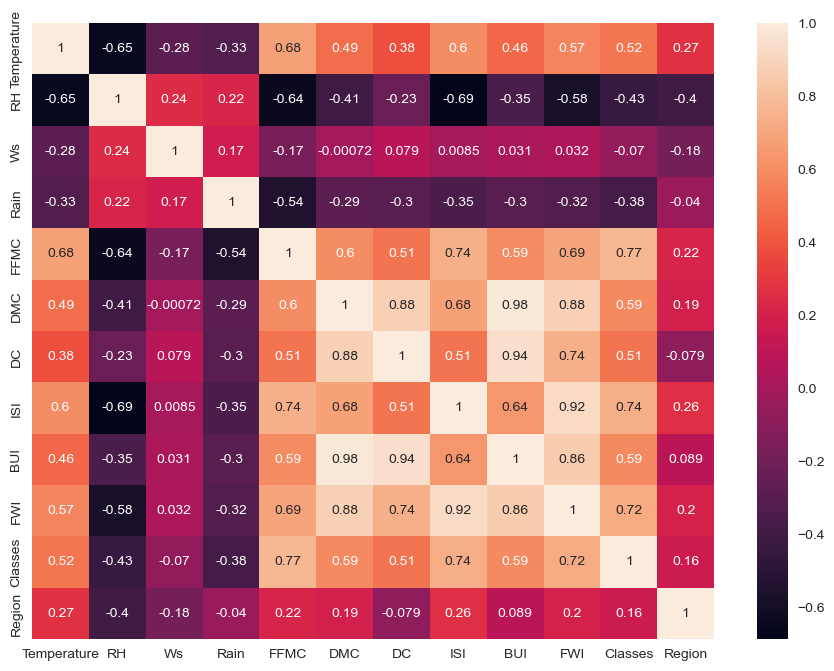

In [38]:
plt.figure(figsize = (11,8))
sns.heatmap(df_copy.corr(),annot = True)

---

D:\Anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FWI'>

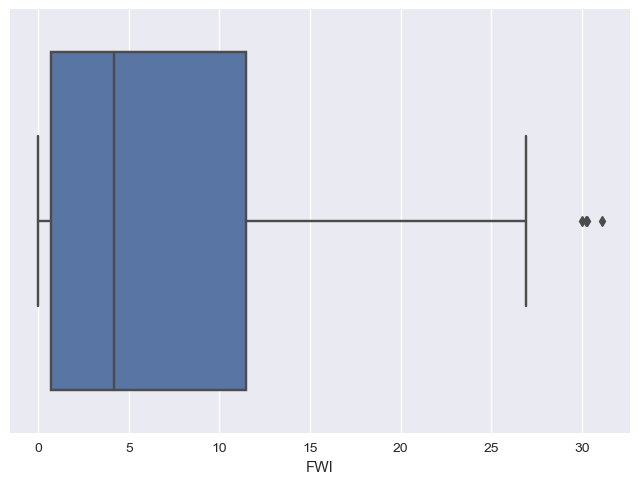

In [39]:
sns.boxplot(df['FWI'])

---

### <font color = 'Blue'> Montly Fire analysics for different region

Text(0.5, 1.0, 'Fire analysics of Bajaia region')

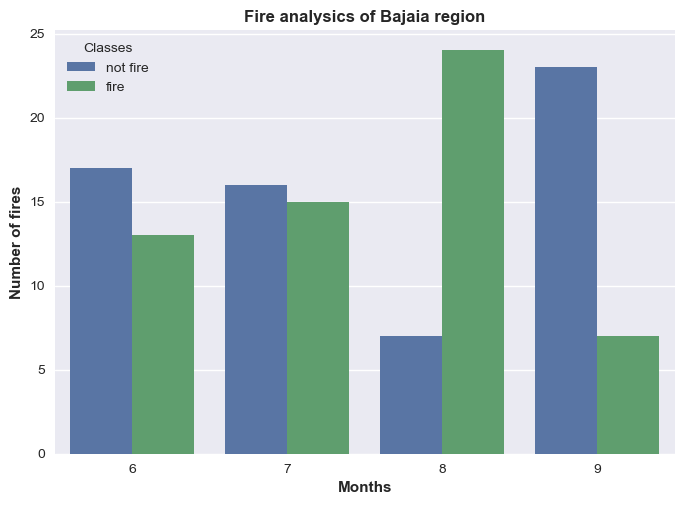

In [40]:
# montly fire analysics for Bejaia region

df_temp = df.loc[df['Region'] == 1]

sns.countplot(data = df_temp , x = 'month',hue = 'Classes')

plt.ylabel('Number of fires',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.title('Fire analysics of Bajaia region',weight = 'bold')

Text(0.5, 1.0, 'Fire analysics of Sid Bel-Abbes region')

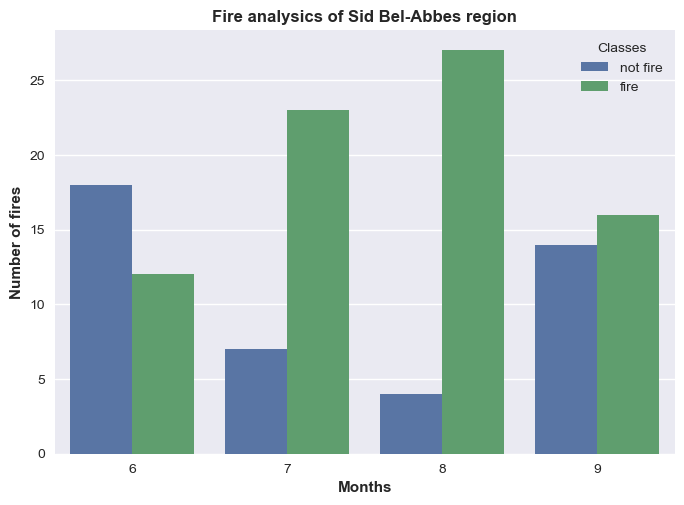

In [41]:
# montly fire analysics Sid Bel-Abbes region

df_temp = df.loc[df['Region'] == 2]

sns.countplot(data = df_temp , x = 'month',hue = 'Classes')

plt.ylabel('Number of fires',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.title('Fire analysics of Sid Bel-Abbes region',weight = 'bold')

#### <font color = '#AA00FF'> Observation :
Its observed that July and August had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

---